In [22]:
#set up libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder

In [23]:
df = pd.read_csv("Clean_Data.csv")

In [ ]:
df.head()

AxesSubplot(0.125,0.125;0.62x0.755)


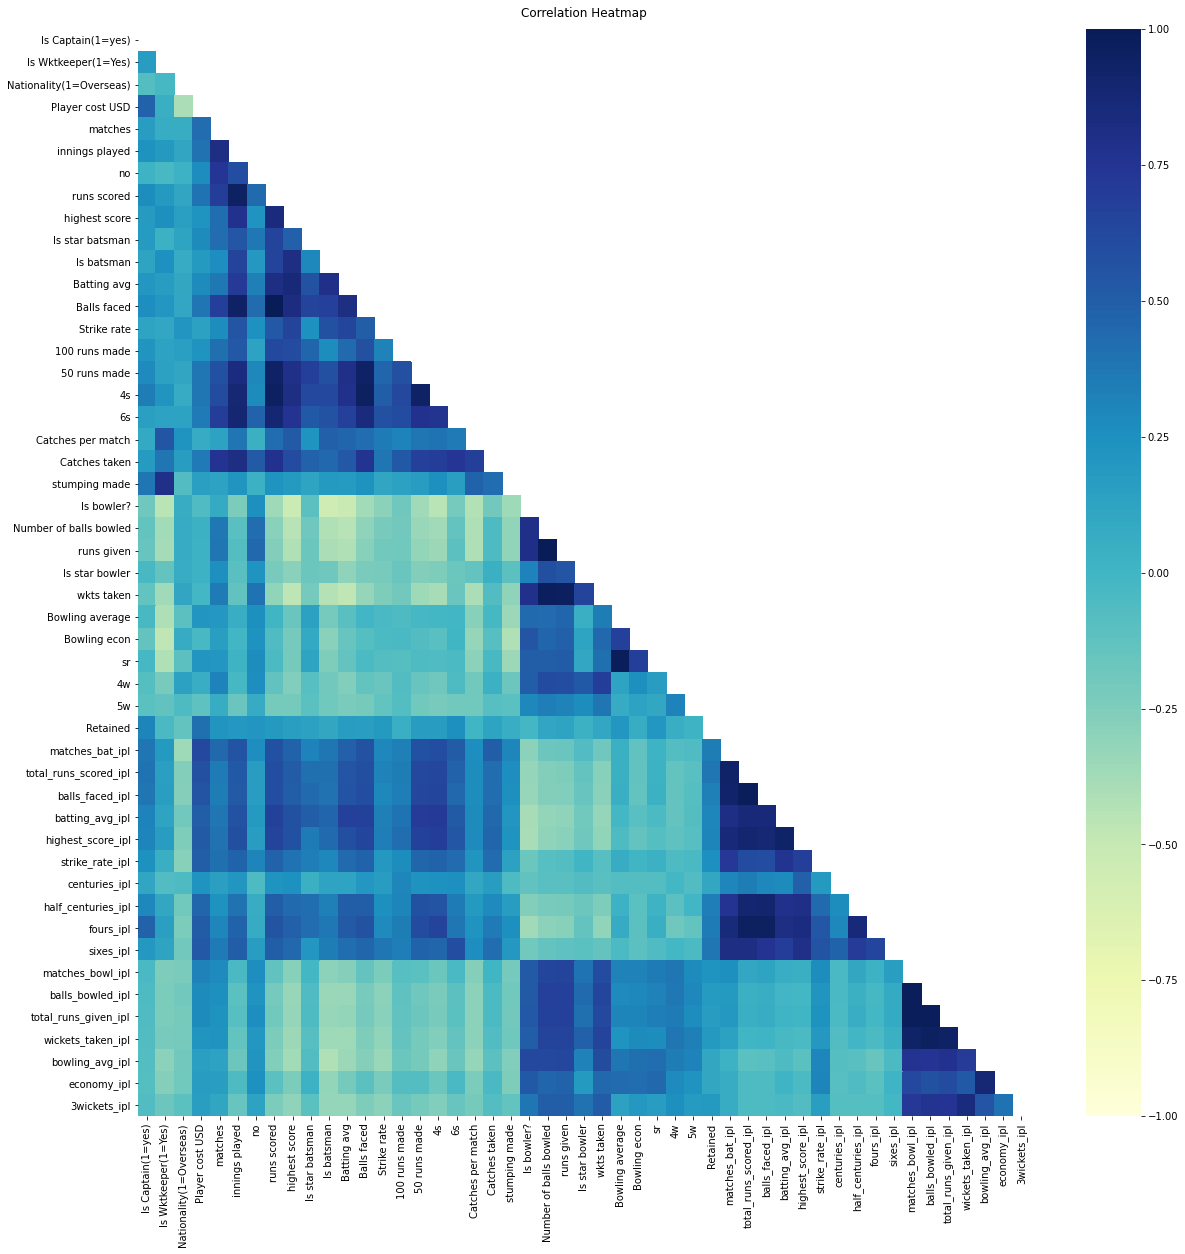

In [24]:
#making correlation heatmap - do before encoding

plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12) 
print(heatmap)

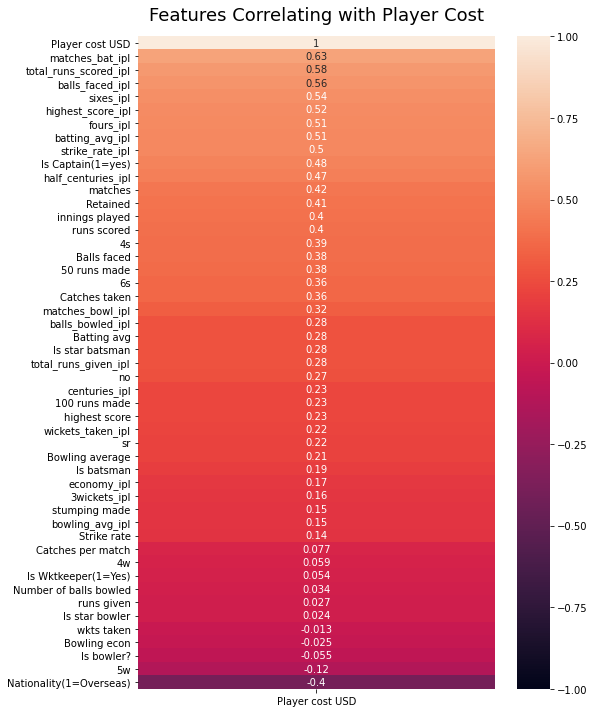

In [25]:
#making heatmap of correlation with player cost variable only

plt.figure(figsize=(8, 12))

heatmap2 = sns.heatmap(df.corr()[['Player cost USD']].sort_values(by='Player cost USD', ascending=False), vmin=-1, vmax=1, annot=True)

heatmap2.set_title('Features Correlating with Player Cost', fontdict={'fontsize':18}, pad=16);

In [ ]:
#one hot encoding on categorical variable Team

df['Team'] = df['Team'].astype('category')
df['Team_Cat'] = df['Team'].cat.codes

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Team_Cat']]).toarray())

pd.set_option('display.max_rows', None)
print(df[['Team', 'Team_Cat']])


In [ ]:
#renaming resulting columns to show country name

df = df.join(enc_df)
df.rename({0: 'Team_Australia', 1: 'Team_Bangladesh', 2: 'Team_England', 3: 'Team_India', 4: 'Team_Netherlands', 5: 'Team_New Zealand', 6: 'Team_South Africa', 7: 'Team_Sri Lanka', 8: 'Team_West Indies'}, axis=1, inplace=True)
df.head()

In [ ]:
#one hot encoding on categorical variable IPL 4 Franchise

df['IPL 4 Franchise'] = df['IPL 4 Franchise'].astype('category')
df['IPL 4 Franchise Cat'] = df['IPL 4 Franchise'].cat.codes

enc1 = OneHotEncoder(handle_unknown='ignore')
enc_df1 = pd.DataFrame(enc1.fit_transform(df[['IPL 4 Franchise Cat']]).toarray())

pd.set_option('display.max_rows', None)
print(df[['IPL 4 Franchise', 'IPL 4 Franchise Cat']])

In [ ]:
#renaming resulting columns to show country name

df = df.join(enc_df1)
df.rename({0: 'Chennai Super Kings', 1: 'Deccan Chargers', 2: 'Delhi Daredevils', 3: 'Kings XI Punjab', 4: 'Kochi', 5: 'Kolkata Knight Riders', 6: 'Mumbai Indians', 7: 'Pune Warriors', 8: 'Rajasthan Royals', 9: 'Royal Challengers Bangalore'}, axis=1, inplace=True)
df.head()

In [ ]:
df.drop(["Team", "IPL 4 Franchise", "Team_Cat", "IPL 4 Franchise Cat"], axis=1, inplace=True)

# Baseline Model

In [ ]:
# baseline model = mean of the dependent variable

baseline = np.mean(df['Player cost USD'])
baseline

In [ ]:
from sklearn.model_selection import train_test_split
y = df['Player cost USD']
x = df.drop(['Player cost USD'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [ ]:
#calculate metrics of baseline model

y_pred = model.predict(x_val)
results = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
results

# Linear Regression Initial Model

In [ ]:
from sklearn.model_selection import train_test_split
y = df['Player cost USD']
x = df.drop(['Player cost USD'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

In [ ]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [ ]:
r_sq = model.score(x_train, y_train)
print('r2 score:', r_sq)
print('intercept:', model.intercept_)
#print('slope:', model.coef_)
list(zip(x, model.coef_))

In [ ]:
y_pred = model.predict(x_val)
results = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
results

In [ ]:
from sklearn import metrics

y_true = results['Actual']
y_pred = results['Predicted']

print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

# RFE

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=1)
rfe.fit(x,y)

# Model after RFE